In [1]:
"""
created on March 8th 2019

@author: Huan Zheng
"""
# RNN

'\ncreated on March 8th 2019\n\n@author: Huan Zheng\n'

# 理解RNN
## 简单地RNN（numpy）

In [3]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,)) # 初始状态全为0

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    out_puts = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successive_outputs.append(out_puts)
    
    state_t = out_puts
    
final_output_sequence = np.stack(successive_outputs, axis=0)

In [3]:
from keras.layers import SimpleRNN, Embedding
from keras.models import Sequential
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


## 准备IDMB数据

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequence')

print('Pad sequences (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequence
Pad sequences (sample x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## 用Embedding层和SimpleRNN层训练模型

In [4]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=1024,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.6860 - acc: 0.5533 - val_loss: 0.6674 - val_acc: 0.5792
Epoch 2/10
20000/20000 [==============================] - 13s 651us/step - loss: 0.6106 - acc: 0.6925 - val_loss: 0.6644 - val_acc: 0.5672
Epoch 3/10
20000/20000 [==============================] - 13s 659us/step - loss: 0.5127 - acc: 0.7824 - val_loss: 0.5068 - val_acc: 0.7812
Epoch 4/10
20000/20000 [==============================] - 13s 649us/step - loss: 0.4143 - acc: 0.8386 - val_loss: 0.4477 - val_acc: 0.8060
Epoch 5/10
20000/20000 [==============================] - 13s 653us/step - loss: 0.3630 - acc: 0.8624 - val_loss: 0.4658 - val_acc: 0.7864
Epoch 6/10
20000/20000 [==============================] - 13s 650us/step - loss: 0.3360 - acc: 0.8694 - val_loss: 0.5303 - val_acc: 0.7356
Epoch 7/10
20000/20000 [==============================] - 13s 652us/step - loss: 0.2964 - acc: 0.8934 - val_loss: 0.434

## 结果可视化

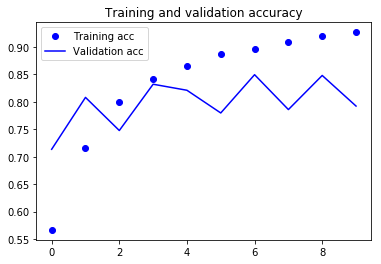

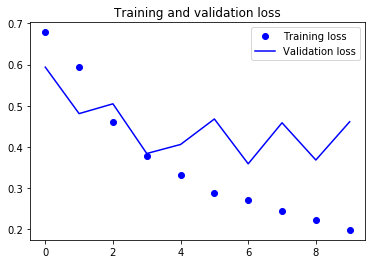

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 理解LSTM层和GRU层

## 使用Keras中的LSTM具体例子

In [5]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=2048,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.6881 - acc: 0.5832 - val_loss: 0.6747 - val_acc: 0.6972
Epoch 2/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.6685 - acc: 0.7111 - val_loss: 0.6055 - val_acc: 0.7412
Epoch 3/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.5429 - acc: 0.7990 - val_loss: 0.5021 - val_acc: 0.8030
Epoch 4/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.4522 - acc: 0.8312 - val_loss: 0.4430 - val_acc: 0.8346
Epoch 5/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.4356 - acc: 0.8378 - val_loss: 0.3989 - val_acc: 0.8468
Epoch 6/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.3713 - acc: 0.8578 - val_loss: 0.3571 - val_acc: 0.8642
Epoch 7/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.3374 - acc: 0.8766 - val_loss: 0.3653 - val_acc:

## 结果可视化

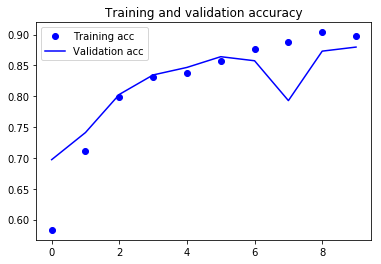

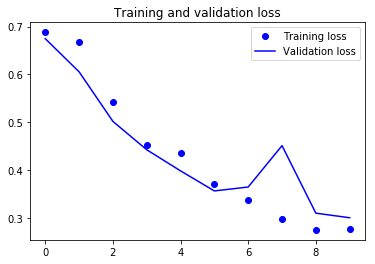

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()